<a href="https://colab.research.google.com/github/Mahdi-Miri/Linear-regression/blob/main/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# Linear regression
!git clone https://github.com/Mahdi-Miri/Linear-regression.git

fatal: destination path 'Linear-regression' already exists and is not an empty directory.


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [127]:
df = pd.read_csv("/content/Linear-regression/student-mat.csv", sep = ";")
#separate with ;

In [128]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [129]:
df = df[["age","absences","freetime","Medu","G1","G2","G3"]]

In [130]:
predict = "G3"

In [131]:
df.head()

,age,absences,freetime,Medu,G1,G2,G3
0,18,6,3,4,5,6,6
1,17,4,3,1,5,5,6
2,15,10,3,1,7,8,10
3,15,2,2,4,15,14,15
4,16,4,3,3,6,10,10


In [132]:
df.describe()

,age,absences,freetime,Medu,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.235443,2.749367,10.908861,10.713924,10.415190
std,1.276043,8.003096,0.998862,1.094735,3.319195,3.761505,4.581443
min,15.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,3.000000,2.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,4.000000,4.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,5.000000,4.000000,19.000000,19.000000,20.000000


In [133]:
df.shape

(395, 7)

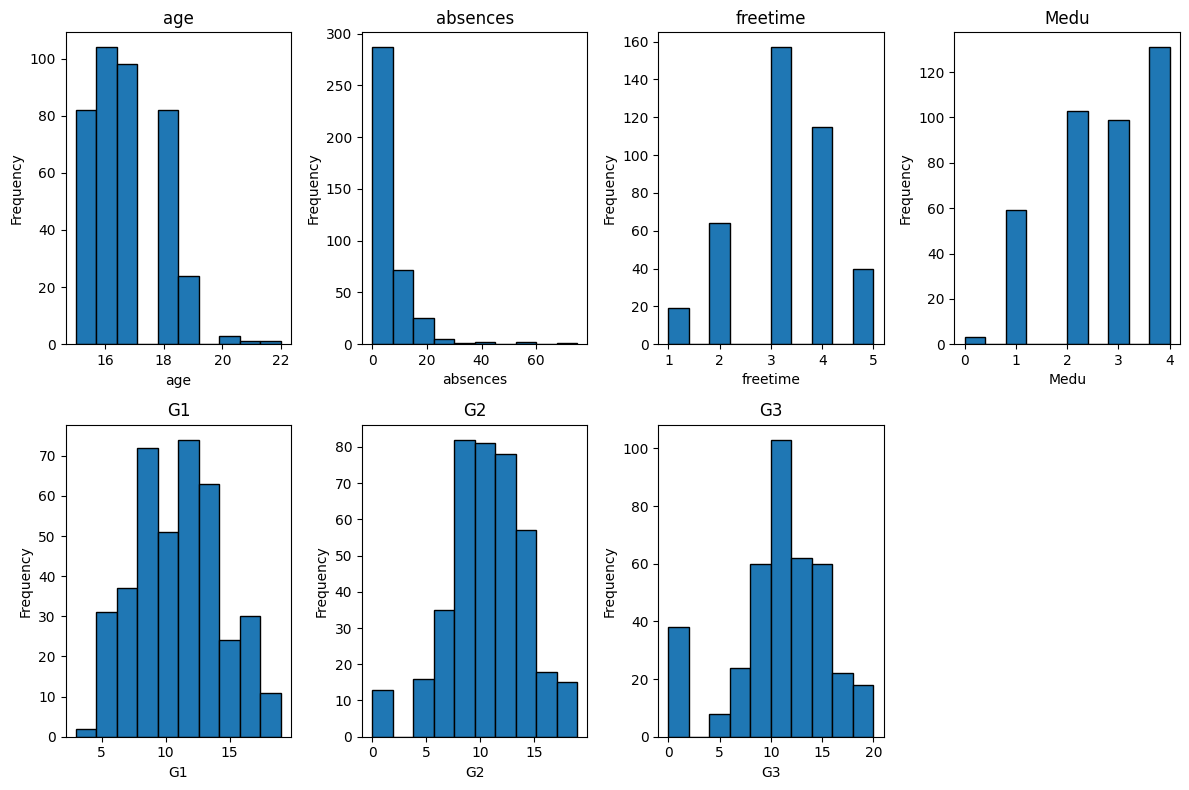

In [134]:
# Create histograms for each numerical column
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [135]:
X = np.array(df.drop(predict, axis=1))

In [136]:
Y = np.array(df[predict])

In [137]:
X

array([[18,  6,  3,  4,  5,  6],
       [17,  4,  3,  1,  5,  5],
       [15, 10,  3,  1,  7,  8],
       ...,
       [21,  3,  5,  1, 10,  8],
       [18,  0,  4,  3, 11, 12],
       [19,  5,  2,  1,  8,  9]])

In [138]:
Y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [139]:
X.shape

(395, 6)

In [140]:
Y.shape

(395,)

In [141]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [142]:
X_train.shape

(316, 6)

In [143]:
Y_train.shape

(316,)

In [144]:
X_test.shape

(79, 6)

In [145]:
Y_test.shape

(79,)

In [146]:
model = linear_model.LinearRegression()

In [147]:
model.fit(X_train,Y_train)

LinearRegression()

In [148]:
acc = model.score(X_test,Y_test)

In [149]:
acc

0.8586869013834871

In [150]:
Y_pred = model.predict(X_test)
for i in range(len(Y_pred)):
  print(f"REAl:{Y_test[i]}, PREDICTED : {Y_pred[i]}")

REAl:10, PREDICTED : 9.133231572465938
REAl:5, PREDICTED : 4.393759114320089
REAl:11, PREDICTED : 11.101999943305932
REAl:16, PREDICTED : 15.963481061900078
REAl:13, PREDICTED : 12.126107431278832
REAl:11, PREDICTED : 10.555392699060606
REAl:14, PREDICTED : 14.250451004766202
REAl:5, PREDICTED : 4.419529635461531
REAl:15, PREDICTED : 16.446070260928934
REAl:0, PREDICTED : 3.273415642158136
REAl:7, PREDICTED : 5.9617636475595255
REAl:0, PREDICTED : 6.764210246806083
REAl:10, PREDICTED : 9.265487441597681
REAl:8, PREDICTED : 7.871476690557344
REAl:13, PREDICTED : 12.228150314478075
REAl:16, PREDICTED : 16.6671674494389
REAl:16, PREDICTED : 15.257653672073868
REAl:4, PREDICTED : 5.830449064801563
REAl:11, PREDICTED : 7.415414305688239
REAl:8, PREDICTED : 8.126123336194919
REAl:11, PREDICTED : 11.371162185393311
REAl:16, PREDICTED : 14.828304140664027
REAl:12, PREDICTED : 11.478791955211726
REAl:17, PREDICTED : 17.002897810545864
REAl:10, PREDICTED : 9.146498508893968
REAl:9, PREDICTED : 8

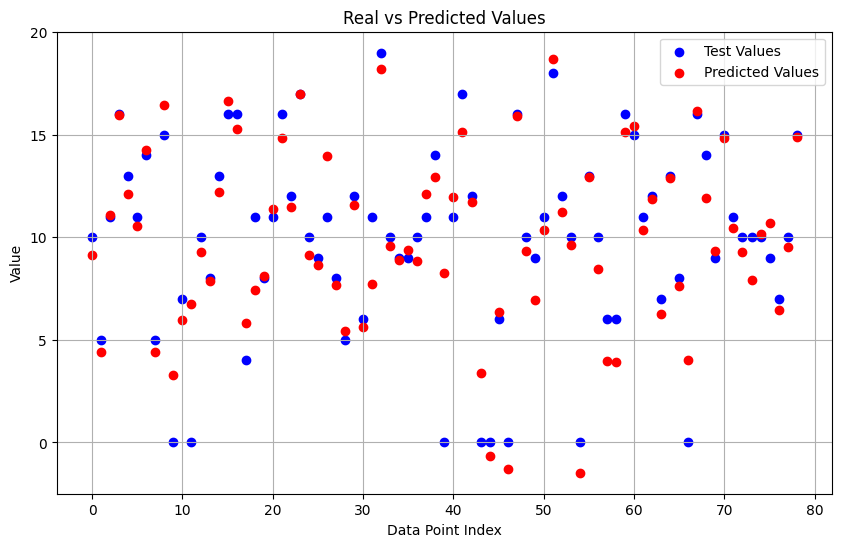

In [151]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Test Values')
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label='Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Real vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

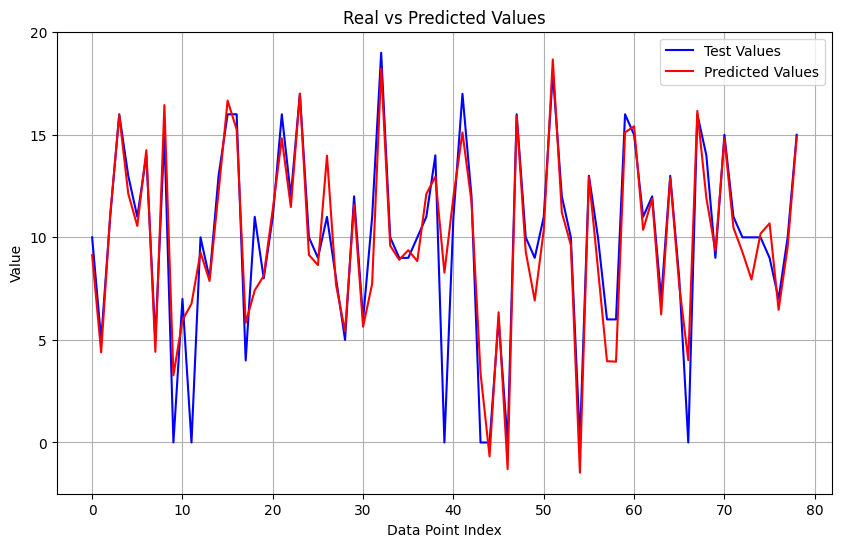

In [152]:
plt.figure(figsize=(10, 6))

# Plot real data as a blue line
plt.plot(range(len(Y_test)), Y_test, color='blue', label='Test Values')

# Plot predicted data as a red line
plt.plot(range(len(Y_pred)), Y_pred, color='red', label='Predicted Values')

plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Real vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
acc

0.8586869013834871